In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# For demonstration perposes, the object chosen is the first object given in the sample list - 
# Nothing significant about it

data = fits.open('/Volumes/WD_External/MaNGA_Sample/manga-8082-12704-LOGCUBE.fits.gz')

In [3]:
# data.info()

In [4]:
flux = np.transpose(data['FLUX'].data, axes=(2, 1, 0))

In [5]:
z = 0.131681

In [6]:
mask = np.transpose(data['MASK'].data, axes=(2, 1, 0))

In [7]:
wave = data['WAVE'].data

In [8]:
flux_header  = data['FLUX'].header

In [9]:
x_center = int(flux_header['CRPIX1']) - 1
y_center = int(flux_header['CRPIX2']) - 1

do_not_use = (mask & 2**10) != 0
flux_m = np.ma.array(flux, mask=do_not_use)

redshift = 0.131681
ind_wave = np.where((wave / (1 + redshift) > 4900) & (wave / (1 + redshift) < 5300))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 3600.  # deg to arcsec
dy = flux_header['CD2_2'] * 3600.  # deg to arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]

[]

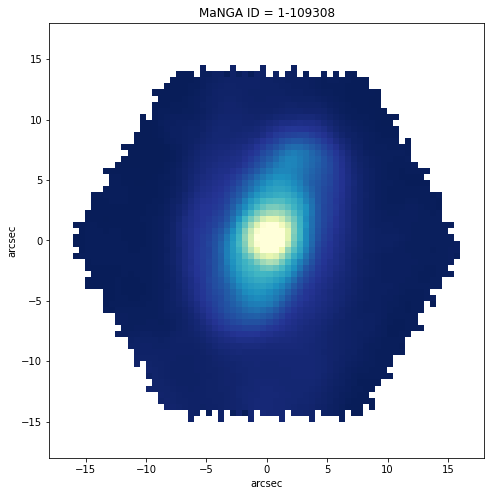

In [10]:
plt.figure(figsize = (8,8))
# plt.grid()
plt.imshow(im, extent=extent, cmap=cm.YlGnBu_r, vmin=0.1, vmax=100, origin='lower', interpolation='none')
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.title('MaNGA ID = 1-109308')
plt.plot()
# plt.savefig('Screenshots_/demo_2d')

In [11]:
n = len(flux[0])
sumflux = [0.]*(4563)

for i in range(n):
    for j in range(n):
        sumflux = [sum(x) for x in zip(sumflux,flux[i][j])]

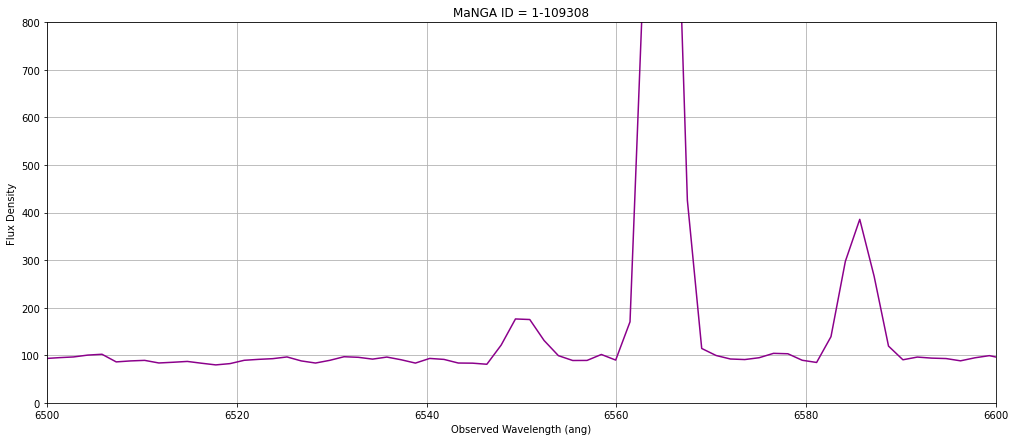

In [24]:
plt.figure(figsize = (17,7))
plt.grid()
plt.xlabel('Observed Wavelength (ang)')
plt.ylabel('Flux Density')
plt.ylim(0,800)
plt.xlim(6500,6600)
plt.vlines(x=[5550,5600], ymin = min(sumflux), ymax = max(sumflux), linewidth = 3)
plt.vlines(x=[4840,4880], ymin = min(sumflux), ymax = max(sumflux), color = 'orange', linewidth = 3)
plt.axvline(5007, color = 'mediumseagreen', linewidth = 3)
plt.title('MaNGA ID = 1-109308')
plt.plot(wave, sumflux, color = 'darkmagenta')
# plt.savefig('Screenshots_/Demo_flux_density', bbox_inches= "tight")

In [13]:
emitwave = np.array(wave) / (1+0.131681)

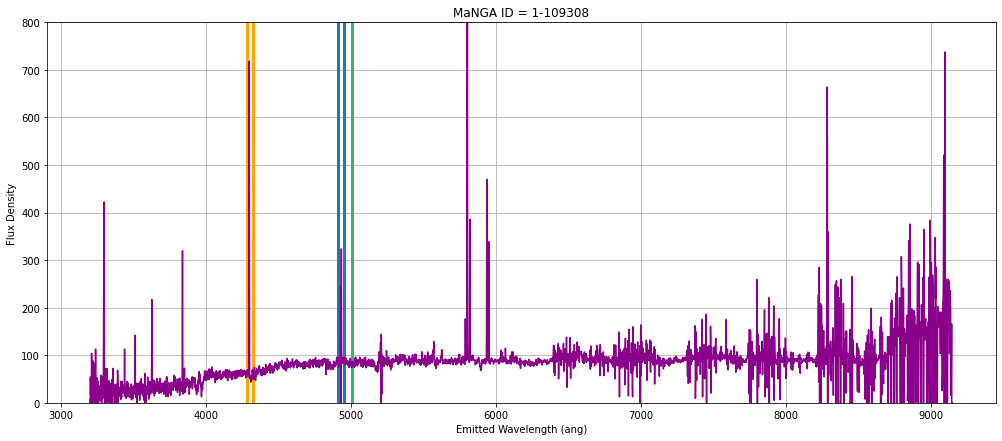

In [21]:
plt.figure(figsize = (17,7))
plt.grid()
plt.xlabel('Emitted Wavelength (ang)')
plt.ylabel('Flux Density')
plt.ylim(0,800)
# plt.xlim(4200,5020)
plt.vlines(x=[4910,4950], ymin = min(sumflux), ymax = max(sumflux), linewidth = 3)
plt.vlines(x=[4280,4320], ymin = min(sumflux), ymax = max(sumflux), color = 'orange', linewidth = 3)
plt.axvline(5007, color = 'mediumseagreen', linewidth = 3)
plt.title('MaNGA ID = 1-109308')
plt.plot(emitwave, sumflux, color = 'darkmagenta')
# plt.savefig('Screenshots_/Demo_flux_density', bbox_inches= "tight")

In [15]:
data1 = fits.open('/Volumes/WD_External/MaNGA_Sample/manga-7815-3701-LOGCUBE.fits.gz')

In [16]:
flux1 = np.transpose(data1['FLUX'].data, axes=(2, 1, 0))

z1 = 0.136342

mask1 = np.transpose(data1['MASK'].data, axes=(2, 1, 0))

wave1 = data1['WAVE'].data

In [17]:
n1 = len(flux1[0])
sumflux1 = [0.]*(4563)

for i in range(n1):
    for j in range(n1):
        sumflux1 = [sum(x) for x in zip(sumflux1,flux1[i][j])]

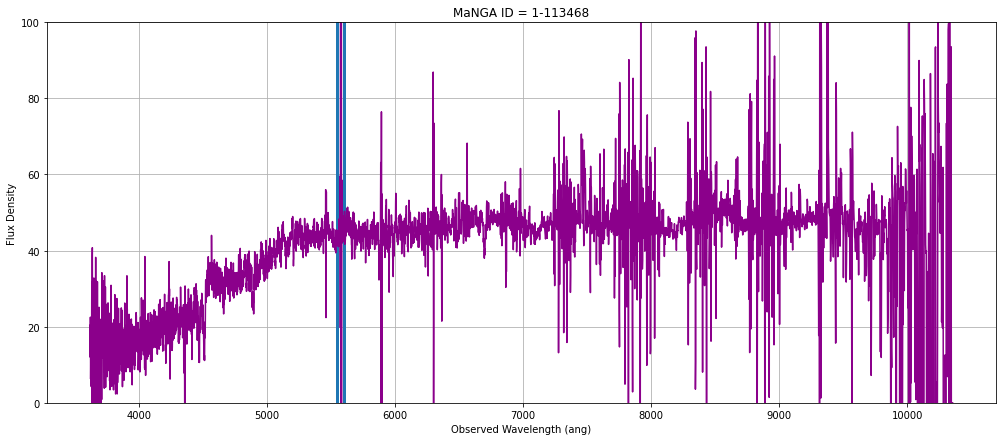

In [26]:
plt.figure(figsize = (17,7))
plt.grid()
plt.xlabel('Observed Wavelength (ang)')
plt.ylabel('Flux Density')
plt.ylim(0,100)
# plt.xlim(4800,6000)
plt.vlines(x=[5550,5600], ymin = min(sumflux), ymax = max(sumflux), linewidth = 3)
# plt.vlines(x=[4840,4880], ymin = min(sumflux), ymax = max(sumflux), color = 'orange', linewidth = 3)
# plt.axvline(5007, color = 'mediumseagreen', linewidth = 3)
plt.title('MaNGA ID = 1-113468')
plt.plot(wave1, sumflux1, color = 'darkmagenta')
# plt.savefig('Screenshots_/Demo_flux_density', bbox_inches= "tight")

In [19]:
emitwave1 = np.array(wave1) / (1+0.136342)

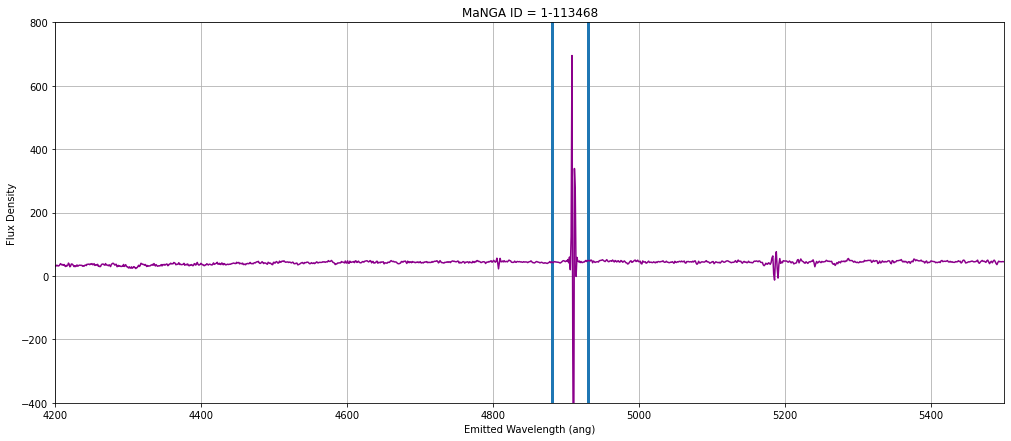

In [20]:
plt.figure(figsize = (17,7))
plt.grid()
plt.xlabel('Emitted Wavelength (ang)')
plt.ylabel('Flux Density')
plt.ylim(-400,800)
plt.xlim(4200,5500)
plt.vlines(x=[4880,4930], ymin = min(sumflux), ymax = max(sumflux), linewidth = 3)
# plt.vlines(x=[4280,4320], ymin = min(sumflux), ymax = max(sumflux), color = 'orange', linewidth = 3)
# plt.axvline(5007, color = 'mediumseagreen', linewidth = 3)
plt.title('MaNGA ID = 1-113468')
plt.plot(emitwave1, sumflux1, color = 'darkmagenta')
# plt.savefig('Screenshots_/Demo_flux_density', bbox_inches= "tight")